In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

###Downloading Historical Stock Data

In [ ]:
ticker_symbol =  ['AAPL', 'TSLA', 'AMZN', 'IBM', 'GOOG','META', '^GSPC'] #'^GSPC is the S&P 500 index
period = '10y'

# The download is used to retrive multiple stocks into a dataframe.
stock_data = yf.download(ticker_symbol, period=period)['Close']
stock_data.rename(columns={'^GSPC': 'S&P 500'}, inplace=True) #inplace = True makes the change permanant
stock_data

[*********************100%%**********************]  7 of 7 completed


Ticker            AAPL        AMZN        GOOG         IBM        META  \
Date                                                                     
2014-05-21   21.653929   15.250500   26.873220  178.193115   60.490002   
2014-05-22   21.688213   15.245500   27.178383  177.514343   60.520000   
2014-05-23   21.933214   15.612000   27.559336  177.762909   61.349998   
2014-05-27   22.343929   15.541000   28.220022  176.653915   63.480000   
2014-05-28   22.286072   15.508000   28.007107  175.028687   63.509998   
...                ...         ...         ...         ...         ...   
2024-05-14  187.429993  187.070007  171.929993  167.360001  471.850006   
2024-05-15  189.720001  185.990005  173.880005  168.259995  481.540009   
2024-05-16  189.839996  183.630005  175.429993  168.970001  473.230011   
2024-05-17  189.869995  184.699997  177.289993  169.029999  471.910004   
2024-05-20  191.039993  183.539993  178.460007  169.919998  468.839996   

Ticker            TSLA      S&P 500  
Date                                 
2014-05-21   13.296667  1888.030029  
2014-05-22   13.658667  1892.489990  
2014-05-23   13.820000  1900.530029  
2014-05-27   14.104000  1911.910034  
2014-05-28   14.016000  1909.780029  
...                ...          ...  
2024-05-14  177.550003  5246.680176  
2024-05-15  173.990005  5308.149902  
2024-05-16  174.839996  5297.100098  
2024-05-17  177.460007  5303.270020  
2024-05-20  174.949997  5308.129883  

[2517 rows x 7 columns]

In [ ]:
type(stock_data)

pandas.core.frame.DataFrame

###Statistical Summary

In [ ]:
stock_data.describe()

Ticker         AAPL         AMZN         GOOG          IBM         META  \
count   2517.000000  2517.000000  2517.000000  2517.000000  2517.000000   
mean      84.061394    90.369068    73.780866   140.719038   193.399976   
std       58.233503    52.359357    39.649911    17.890985    94.774109   
min       21.653929    14.347500    24.560070    90.602295    60.490002   
25%       31.875000    39.223999    39.227001   128.948380   121.589996   
50%       52.209999    89.628502    59.223000   138.355637   175.190002   
75%      143.779999   137.669998   106.887497   149.827911   248.149994   
max      198.110001   189.500000   178.460007   197.779999   527.340027   

Ticker         TSLA      S&P 500  
count   2517.000000  2517.000000  
mean     100.687967  3128.841629  
std      108.717625   952.860205  
min        9.578000  1829.079956  
25%       16.415333  2187.020020  
50%       22.923332  2873.340088  
75%      203.330002  4017.770020  
max      409.970001  5308.149902

In [ ]:
#This is to check if there are any missing data
stock_data.isnull().sum()

Ticker
AAPL       0
AMZN       0
GOOG       0
IBM        0
META       0
TSLA       0
S&P 500    0
dtype: int64

###Calculating Stock log returns
Benefits of using log returns:

$\log\left(\frac{x_t}{x_{t-1}}\right)$


*   Log returns are additive which means you can simply add up all the returns to acquire an average.
*   Log returns are more normally distributed which make it easier to use in statistical analyses.
* Log returns handle large price changes more symmetrically where as simple returns can cause skewness.



In [ ]:
log_return = np.log(stock_data / stock_data.shift()) * 100
log_return.describe()

Ticker         AAPL         AMZN         GOOG          IBM         META  \
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean       0.086538     0.098880     0.075248    -0.001890     0.081390   
std        1.785388     2.057311     1.768555     1.504429     2.376936   
min      -13.770805   -15.139791   -11.766725   -13.754774   -30.639058   
25%       -0.737377    -0.864206    -0.709201    -0.651537    -0.917077   
50%        0.075668     0.116494     0.099689     0.047243     0.110732   
75%        1.008966     1.111827     0.937696     0.705353     1.221486   
max       11.315748    13.217783    14.887184    10.706846    20.930747   

Ticker         TSLA      S&P 500  
count   2516.000000  2516.000000  
mean       0.102424     0.041085  
std        3.491059     1.120827  
min      -23.651789   -12.765220  
25%       -1.561293    -0.376752  
50%        0.117817     0.060550  
75%        1.800940     0.568240  
max       18.144500     8.968323

In [ ]:
# This is to replace the 'nan' to value 0 for graphing
log_return.replace(log_return.iloc[0], 0, inplace=True)

In [ ]:
# 10 year return
avg_return = log_return.sum()
avg_return

Ticker
AAPL       217.729589
AMZN       248.782032
GOOG       189.323426
IBM         -4.754015
META       204.778346
TSLA       257.698679
S&P 500    103.370561
dtype: float64

##Graphs

###Price movement over time

In [ ]:
def interactive_plot(df, title):
  fig = px.line(title = title)

  for i in df.columns:
    fig.add_scatter(x = df.index , y = df[i], name = i)

  fig.show()

In [ ]:
interactive_plot(stock_data, 'Stock Prices')

Due to the price of the S&P 500 index we are unable to see the price movements of the otehr stocks, so I'll implement a price regularization to see how the price has changed through the 10 years.

Here we can see that the S&P 500 has not had that much of an aggressive/volitile movement as compared to individual companies, which makes sense as it's an index.

In [ ]:
interactive_plot(log_return, 'Log Returns')

In [ ]:
# Bubble plot

def bubble(df, title):
  fig = go.Figure(data=[go.Scatter(
      x=df.columns, y=log_return.sum(),
      mode='markers',
      marker_size=[60, 60, 60, 60, 60, 60, 60],
      marker=dict(
        color=[120, 125, 130, 135, 140, 145],
        size=[15, 30, 55, 70, 90, 110],
        showscale=False
        )
      )

  ])

  fig.update_layout(
        title=title,
        xaxis_title='Ticker',
        yaxis_title='Sum of Log Returns'
    )

  fig.show()

In [ ]:
bubble(log_return, 'Bubble Chart of Log Return')

###Normalization

In [ ]:
# this forces all market participants to start at 1X so we can see how the prices have changed over time from its start (i.e TSLA on Nov 2021 is 31x from its 2014 start)
def norms(df):
  for i in df.columns:
    df[i] = df[i] / df[i][0]
  return df


In [ ]:
interactive_plot(norms(stock_data), 'Normalized Price Movement')

With the log return plot we are able to see the frequency of returns over time an observe large price movements in the positive or negative.

###Z-Score Standardization
To put it simply, the z-score is a way of measuring the amount of standard deviations the value its mean of 0.

Note: Z-Score standardization is another way to normalize the data.

In [ ]:
def standard(df):
  z_score = (df - df.mean()) / df.std()
  return z_score

In [ ]:
standard(stock_data)

Ticker          AAPL      AMZN      GOOG       IBM      META      TSLA  \
Date                                                                     
2014-05-21 -1.071676 -1.434673 -1.183045  2.094579 -1.402387 -0.803837   
2014-05-22 -1.071088 -1.434769 -1.175349  2.056639 -1.402070 -0.800508   
2014-05-23 -1.066880 -1.427769 -1.165741  2.070533 -1.393313 -0.799024   
2014-05-27 -1.059827 -1.429125 -1.149078  2.008547 -1.370838 -0.796412   
2014-05-28 -1.060821 -1.429755 -1.154448  1.917706 -1.370522 -0.797221   
...              ...       ...       ...       ...       ...       ...   
2024-05-14  1.775071  1.846870  2.475393  1.489072  2.938039  0.706988   
2024-05-15  1.814396  1.826244  2.524574  1.539376  3.040282  0.674242   
2024-05-16  1.816456  1.781170  2.563666  1.579061  2.952600  0.682061   
2024-05-17  1.816971  1.801606  2.610577  1.582415  2.938672  0.706160   
2024-05-20  1.837063  1.779451  2.640085  1.632161  2.906279  0.683073   

Ticker       S&P 500  
Date                  
2014-05-21 -1.302197  
2014-05-22 -1.297516  
2014-05-23 -1.289078  
2014-05-27 -1.277136  
2014-05-28 -1.279371  
...              ...  
2024-05-14  2.222612  
2024-05-15  2.287123  
2024-05-16  2.275526  
2024-05-17  2.282001  
2024-05-20  2.287102  

[2517 rows x 7 columns]

In [ ]:
interactive_plot(standard(stock_data), 'Z-Score Standardization')

###Frequency of returns

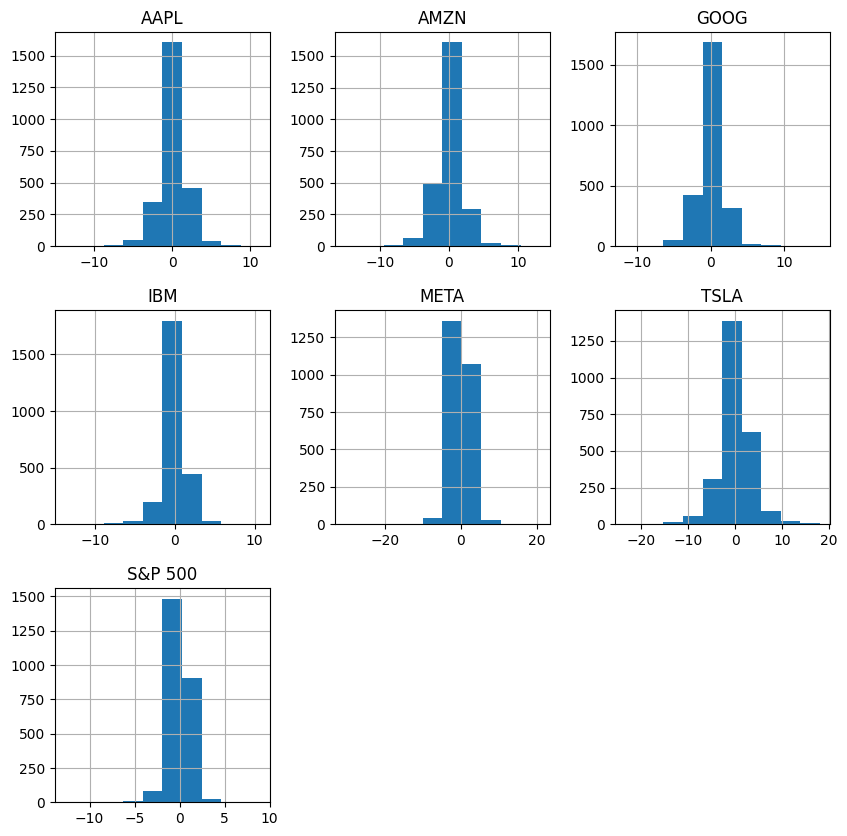

In [ ]:
# A quick and standard histogram of each security
log_return.hist(figsize = (10, 10), bins=10);

In [ ]:
# Interactive Histogram with probability density(y-axis) and returns(x-axis)
data = list([log_return[i].values for i in log_return.columns])
data

fig = ff.create_distplot(data, log_return.columns, bin_size=.5)
fig.update_layout(title='Discrete probability of Returns')
fig.show()

The distribution line mapped on the histogram is the Kernal Density Estimate which is used to visualize the distribution of the boserved dataset. It is analogous to a continuous probability density curve.

###Correlation of Log Daily returns

This tells us about the relationship between each stock the more positive it is the more they move together whiel if negative the more they move in opposite directions. Correlation scales/bounds the range to [-1,1]

<Axes: xlabel='Ticker', ylabel='Ticker'>

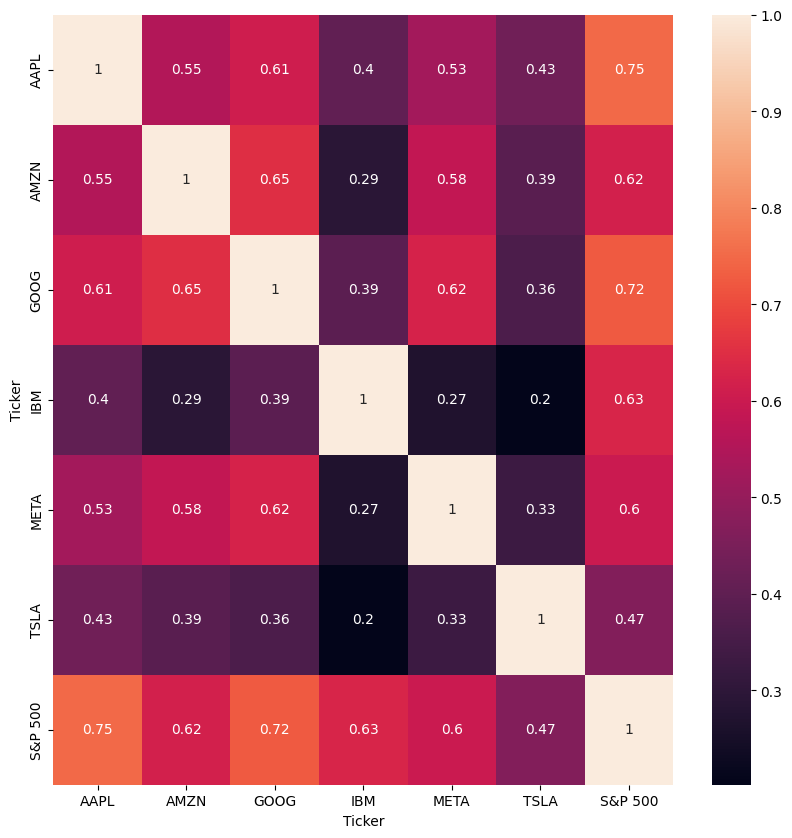

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(log_return.corr(), annot=True)